# Wine Data Analysis

This dataset is available on kaggle: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/data

The two main purposes of this study are:

    1. Analyze and explore the data
    2. Build a Machine Learning Model

Let's start with some exploratory data analysis (EDA) regarding wine  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing the dataset:

In [2]:
df=pd.read_csv('Wine_Kg.csv')

Taking a look on what we have to work 

In [3]:
df.head()  

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Checking if there are any missing values

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [6]:
df.describe().T

count        mean         std      min        25%  \
fixed acidity         1143.0    8.311111    1.747595  4.60000    7.10000   
volatile acidity      1143.0    0.531339    0.179633  0.12000    0.39250   
citric acid           1143.0    0.268364    0.196686  0.00000    0.09000   
residual sugar        1143.0    2.532152    1.355917  0.90000    1.90000   
chlorides             1143.0    0.086933    0.047267  0.01200    0.07000   
free sulfur dioxide   1143.0   15.615486   10.250486  1.00000    7.00000   
total sulfur dioxide  1143.0   45.914698   32.782130  6.00000   21.00000   
density               1143.0    0.996730    0.001925  0.99007    0.99557   
pH                    1143.0    3.311015    0.156664  2.74000    3.20500   
sulphates             1143.0    0.657708    0.170399  0.33000    0.55000   
alcohol               1143.0   10.442111    1.082196  8.40000    9.50000   
quality               1143.0    5.657043    0.805824  3.00000    5.00000   
Id                    1143.0  804.969379  463.997116  0.00000  411.00000   

                            50%          75%         max  
fixed acidity           7.90000     9.100000    15.90000  
volatile acidity        0.52000     0.640000     1.58000  
citric acid             0.25000     0.420000     1.00000  
residual sugar          2.20000     2.600000    15.50000  
chlorides               0.07900     0.090000     0.61100  
free sulfur dioxide    13.00000    21.000000    68.00000  
total sulfur dioxide   37.00000    61.000000   289.00000  
density                 0.99668     0.997845     1.00369  
pH                      3.31000     3.400000     4.01000  
sulphates               0.62000     0.730000     2.00000  
alcohol                10.20000    11.100000    14.90000  
quality                 6.00000     6.000000     8.00000  
Id                    794.00000  1209.500000  1597.00000

As we can see, there is a column called 'ID', this information is not useful in this data analysis and there is no meaning on keeping it. So let's drop this feature

In [7]:
df = df.drop('Id', axis=1)

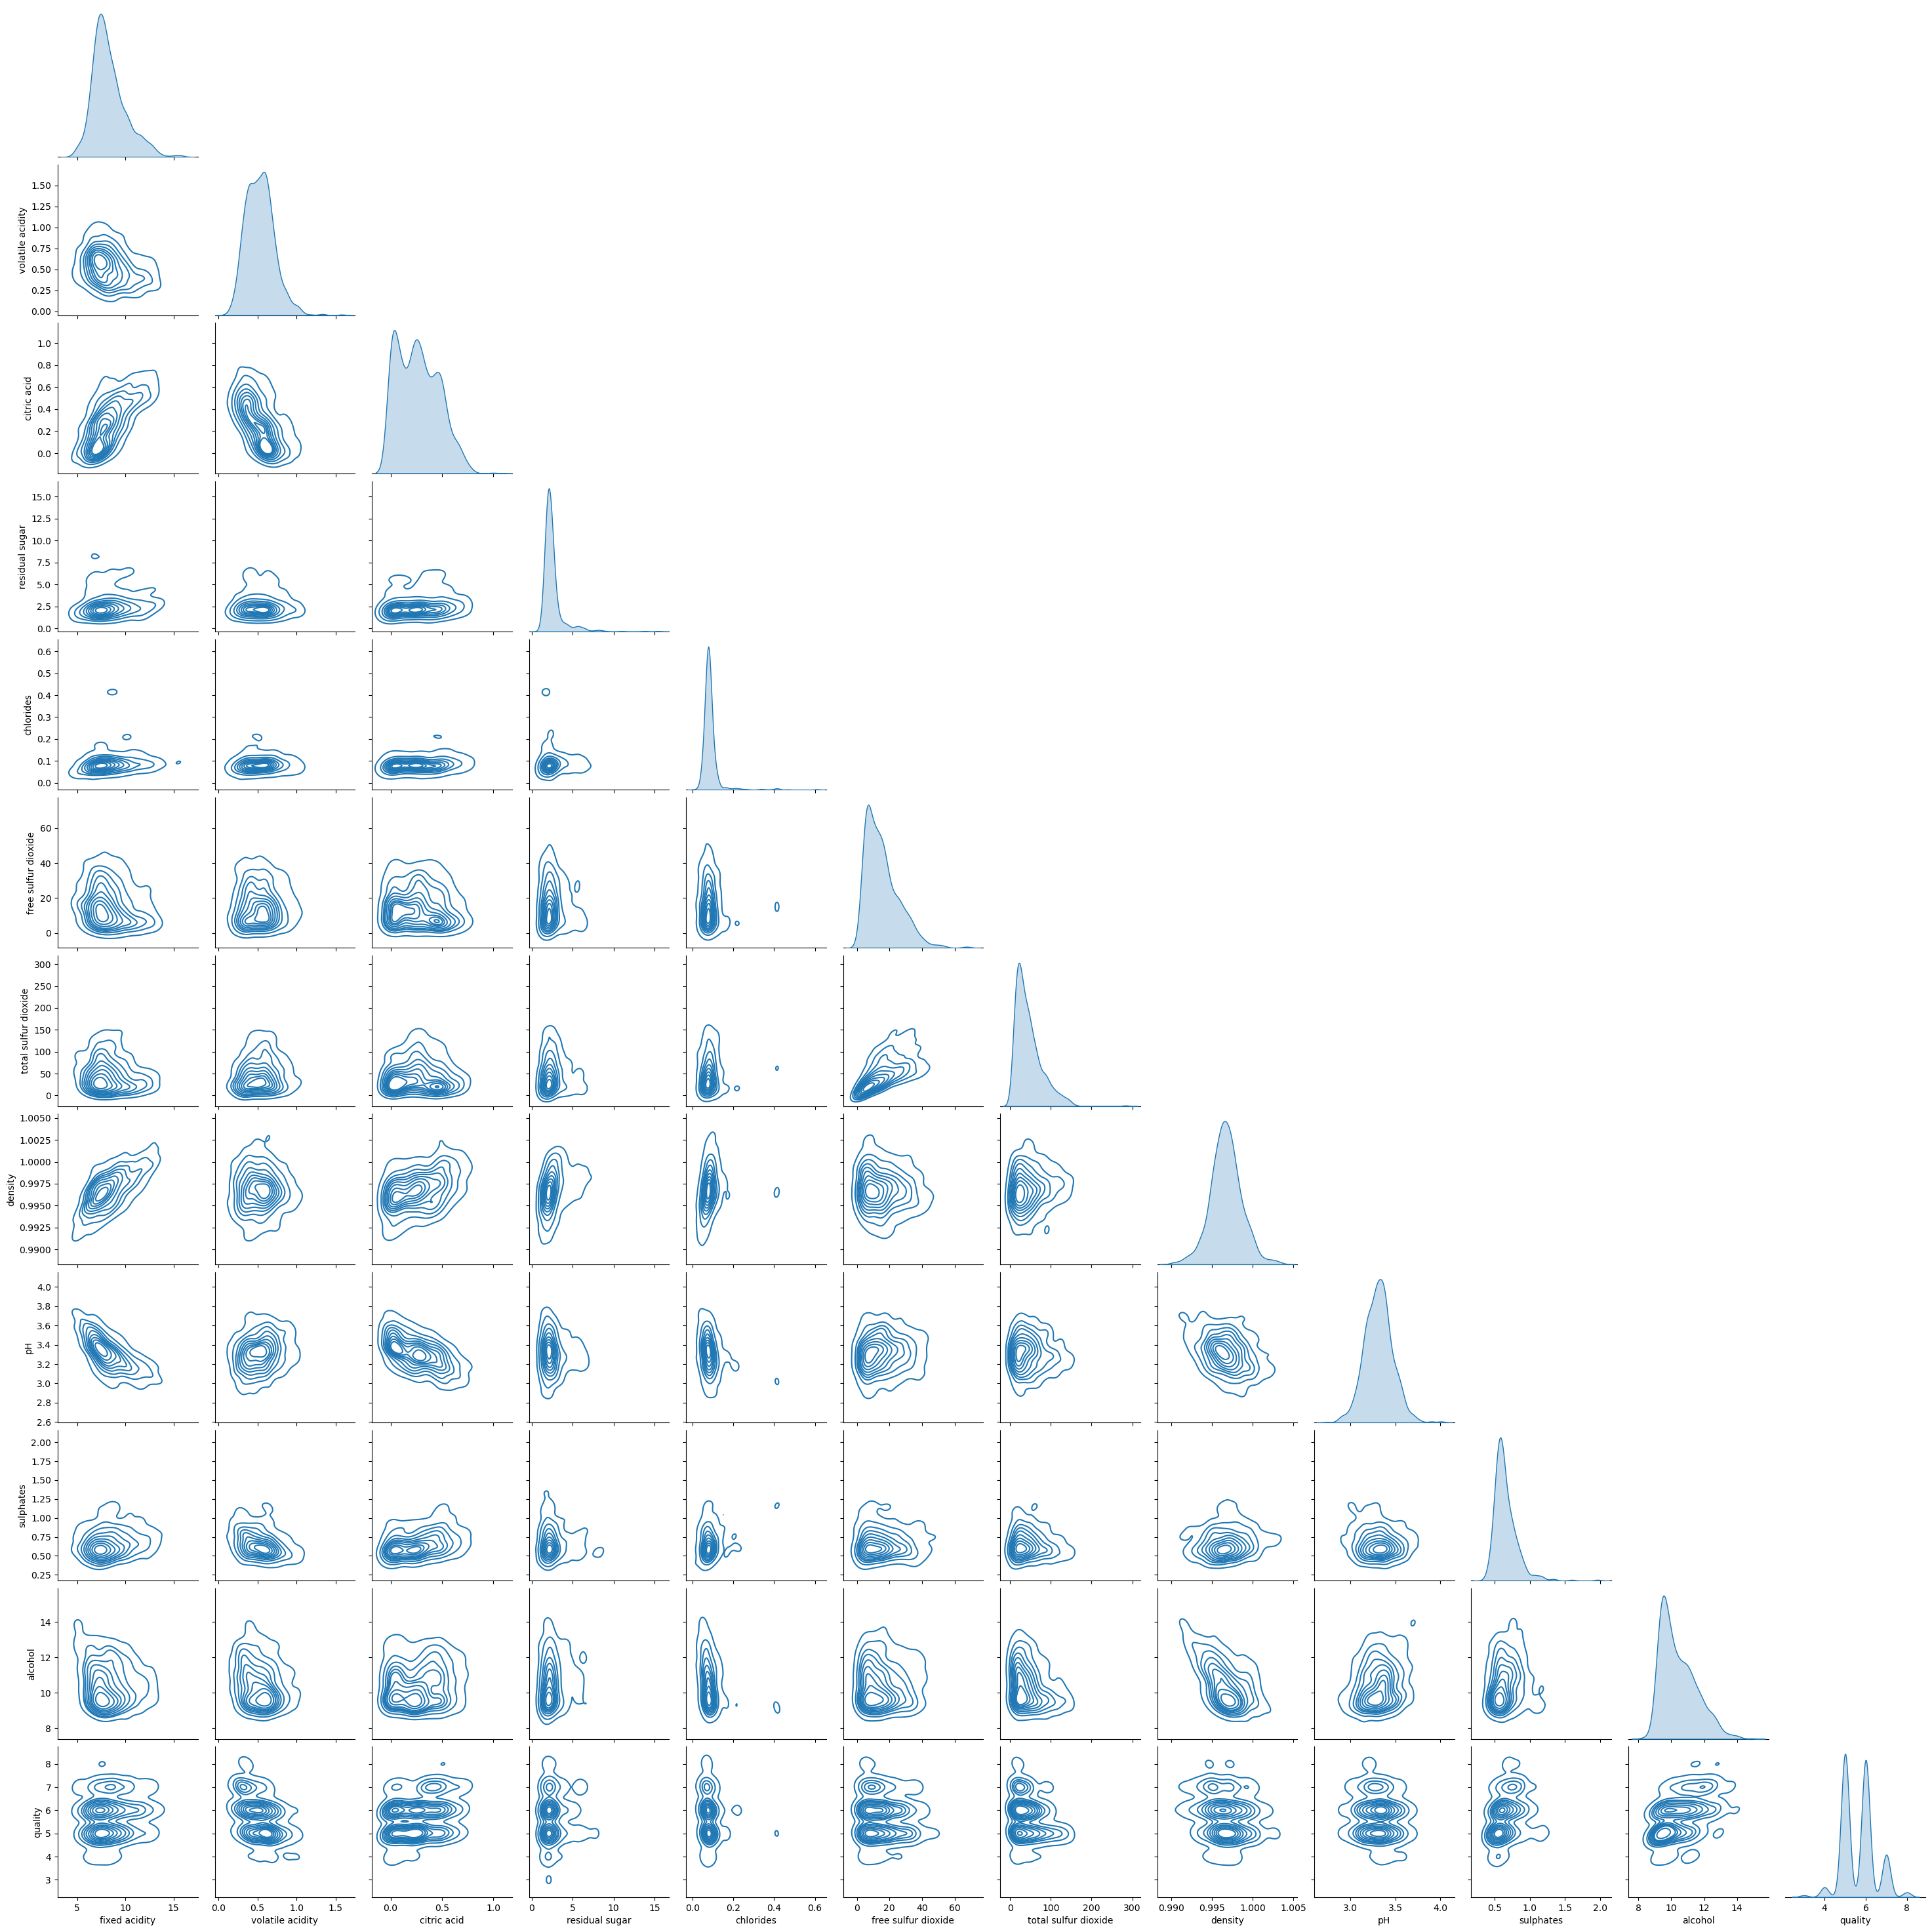

In [8]:
sns.pairplot(df, kind="kde",corner=True)

Let's create a correlation between the features

In [9]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.250728     0.673157   
volatile acidity          -0.250728          1.000000    -0.544187   
citric acid                0.673157         -0.544187     1.000000   
residual sugar             0.171831         -0.005751     0.175815   
chlorides                  0.107889          0.056336     0.245312   
free sulfur dioxide       -0.164831         -0.001962    -0.057589   
total sulfur dioxide      -0.110628          0.077748     0.036871   
density                    0.681501          0.016512     0.375243   
pH                        -0.685163          0.221492    -0.546339   
sulphates                  0.174592         -0.276079     0.331232   
alcohol                   -0.075055         -0.203909     0.106250   
quality                    0.121970         -0.407394     0.240821   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.171831   0.107889            -0.164831   
volatile acidity           -0.005751   0.056336            -0.001962   
citric acid                 0.175815   0.245312            -0.057589   
residual sugar              1.000000   0.070863             0.165339   
chlorides                   0.070863   1.000000             0.015280   
free sulfur dioxide         0.165339   0.015280             1.000000   
total sulfur dioxide        0.190790   0.048163             0.661093   
density                     0.380147   0.208901            -0.054150   
pH                         -0.116959  -0.277759             0.072804   
sulphates                   0.017475   0.374784             0.034445   
alcohol                     0.058421  -0.229917            -0.047095   
quality                     0.022002  -0.124085            -0.063260   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.110628  0.681501 -0.685163   0.174592   
volatile acidity                  0.077748  0.016512  0.221492  -0.276079   
citric acid                       0.036871  0.375243 -0.546339   0.331232   
residual sugar                    0.190790  0.380147 -0.116959   0.017475   
chlorides                         0.048163  0.208901 -0.277759   0.374784   
free sulfur dioxide               0.661093 -0.054150  0.072804   0.034445   
total sulfur dioxide              1.000000  0.050175 -0.059126   0.026894   
density                           0.050175  1.000000 -0.352775   0.143139   
pH                               -0.059126 -0.352775  1.000000  -0.185499   
sulphates                         0.026894  0.143139 -0.185499   1.000000   
alcohol                          -0.188165 -0.494727  0.225322   0.094421   
quality                          -0.183339 -0.175208 -0.052453   0.257710   

                       alcohol   quality  
fixed acidity        -0.075055  0.121970  
volatile acidity     -0.203909 -0.407394  
citric acid           0.106250  0.240821  
residual sugar        0.058421  0.022002  
chlorides            -0.229917 -0.124085  
free sulfur dioxide  -0.047095 -0.063260  
total sulfur dioxide -0.188165 -0.183339  
density              -0.494727 -0.175208  
pH                    0.225322 -0.052453  
sulphates             0.094421  0.257710  
alcohol               1.000000  0.484866  
quality               0.484866  1.000000

And now a heatmap to better visualize this information

<AxesSubplot:>

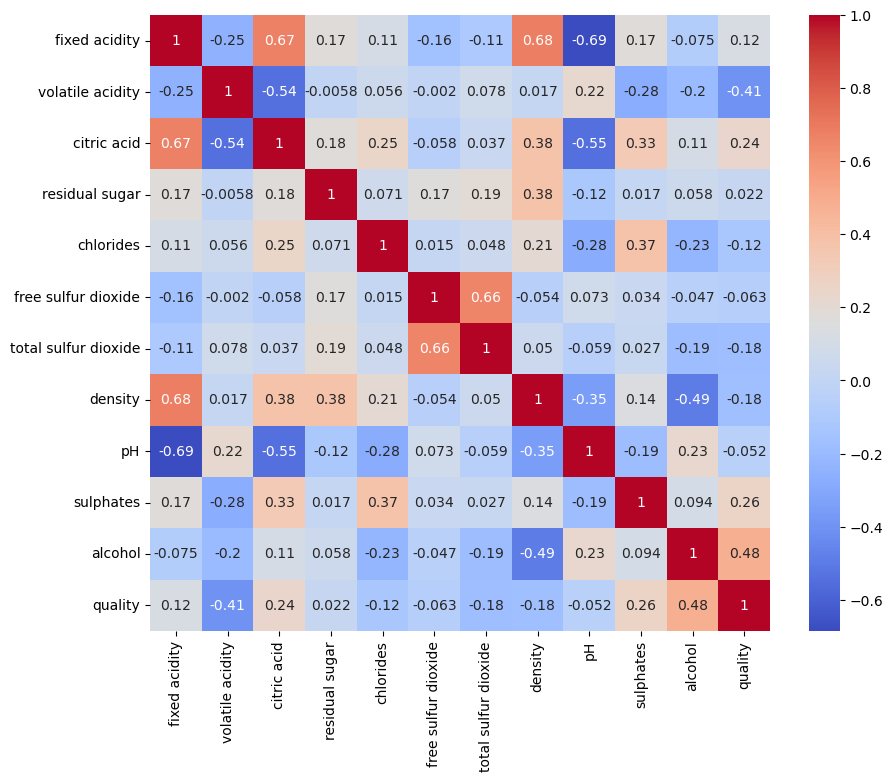

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

From the heatmap we can spot some features that are higly correlated (orange points), for example: alcohol X quality, density X fixed acidity, total sulfur dioxide X free sulfur dioxide and citric acid X fixed acidity. Unless we have some knowledge about wine, diving deep into some of these correlations make not make sense, since we'll not be able to interprete the results. 

Let's take a closer look into alcohol X quality

In [11]:
df['quality'].max()

8

In [12]:
df['quality'].min()

3

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

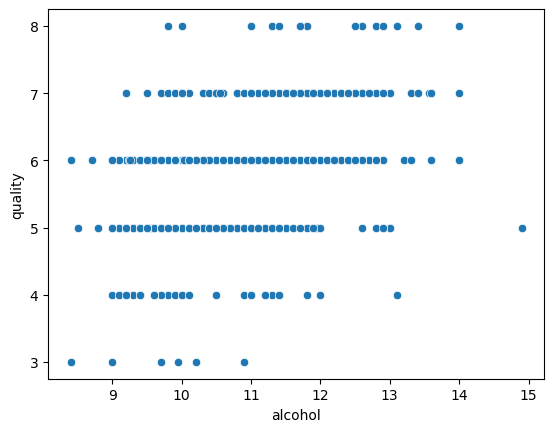

In [13]:
sns.scatterplot(x='alcohol', y='quality', data=df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

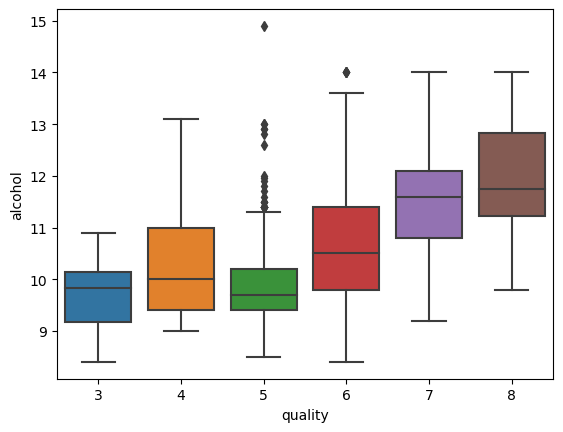

In [14]:
sns.boxplot(y='alcohol', x='quality', data=df)

From the plots above, we can see that the average alcohol content in wines of poor quality is lower than the average for the ones of best quality. Also the alcohol range for the ones classified as quality 8 is wider when in comparison with the wines of quality 3

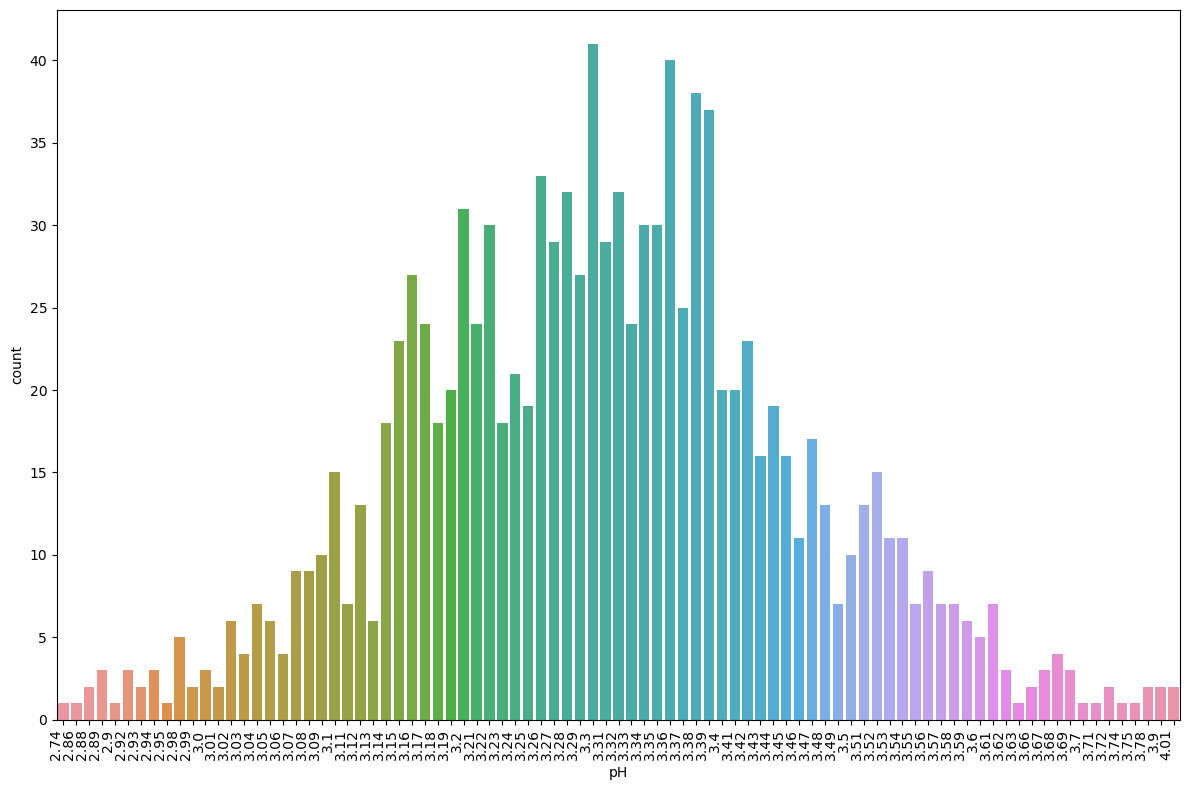

In [15]:
plt.figure(figsize=(12,8))

ph_plot=sns.countplot(x='pH', data=df)

#let's fix the overlapping on the x-axis label

ph_plot.set_xticklabels(ph_plot.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

As we can see from the plot above, the majority of the wines have pH between 3.11 and 3.5. Let's now check the relationship between pH and quality

<AxesSubplot:xlabel='quality', ylabel='pH'>

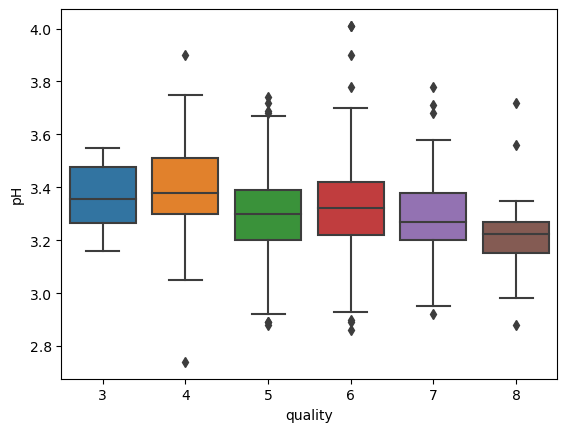

In [16]:
sns.boxplot(y='pH', x='quality', data=df)

When comparing the highest and the lowest quality values, it's possible to affirm that, in global, the higher quality ones are more acid then the ones with quality level 3


In [17]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

The elements with highest effect on the quality of wine are: alchohol, sulphates and citric acid 

In [18]:
import plotly.express as px

In [19]:
px.scatter(df, x="density", y="fixed acidity",animation_frame="quality")

# Machine Learning Section

In [20]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
X=df.drop('quality', axis=1)
y=df['quality']
# quality is our target

In [49]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Testing some models

##### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

In [53]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [54]:
# Train and fit the model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

************** don't know why but i had to scale the data  ******************

In [55]:
predictions_lr = logmodel.predict(X_test)

In [56]:
print(classification_report(y_test,predictions_lr))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         4
           5       0.64      0.76      0.69        95
           6       0.50      0.56      0.53        93
           7       0.27      0.09      0.14        32
           8       0.00      0.00      0.00         4

    accuracy                           0.55       229
   macro avg       0.23      0.24      0.23       229
weighted avg       0.50      0.55      0.52       229



C:\Users\slucianq\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\slucianq\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\slucianq\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [65]:
print(confusion_matrix(y_test,predictions_lr))

[[ 0  0  1  0  0  0]
 [ 0  0  1  3  0  0]
 [ 0  0 72 22  1  0]
 [ 0  0 36 52  5  0]
 [ 0  0  3 26  3  0]
 [ 0  0  0  2  2  0]]


##### Support Vector Classifier - SVC

In [66]:
from sklearn.svm import SVC

In [67]:
model=SVC()

In [68]:
model.fit(X_train, y_train)

SVC()

Getting the predictions from the model

In [69]:
predictions_SVC=model.predict(X_test)

In [70]:
print(confusion_matrix(y_test, predictions_SVC))

[[ 0  0  1  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0 72 22  1  0]
 [ 0  0 32 56  5  0]
 [ 0  0  2 21  9  0]
 [ 0  0  0  3  1  0]]


In [71]:
print(classification_report(y_test, predictions_SVC))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         4
           5       0.65      0.76      0.70        95
           6       0.55      0.60      0.57        93
           7       0.56      0.28      0.38        32
           8       0.00      0.00      0.00         4

    accuracy                           0.60       229
   macro avg       0.29      0.27      0.27       229
weighted avg       0.57      0.60      0.58       229



C:\Users\slucianq\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\slucianq\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\slucianq\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



##### KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier

Starting with k=1

In [73]:
knn=KNeighborsClassifier(n_neighbors=1)

Fitting the model

In [74]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

Let's evaluate the model. Let's use the predict method to predict values using the KNN model and X_test

In [75]:
predictions_knn=knn.predict(X_test)

In [76]:
print(classification_report(y_test,predictions_knn))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         4
           5       0.63      0.63      0.63        95
           6       0.57      0.59      0.58        93
           7       0.55      0.50      0.52        32
           8       0.33      0.25      0.29         4

    accuracy                           0.58       229
   macro avg       0.35      0.33      0.34       229
weighted avg       0.58      0.58      0.58       229



C:\Users\slucianq\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\slucianq\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\slucianq\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [77]:
print(confusion_matrix(y_test,predictions_knn))

[[ 0  0  0  1  0  0]
 [ 0  0  2  2  0  0]
 [ 0  4 60 28  3  0]
 [ 0  1 29 55  7  1]
 [ 0  1  4 10 16  1]
 [ 0  0  0  0  3  1]]


Choosing a K value

In [78]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predi_i = knn.predict(X_test)
    error_rate.append(np.mean(predi_i != y_test))

Text(0, 0.5, 'Error Rate')

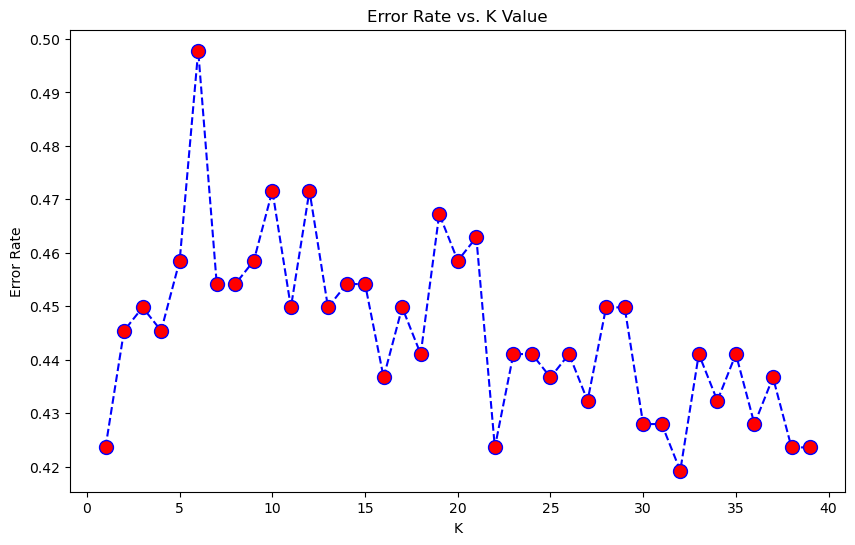

In [79]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [80]:
# Let's choose K=24
knn = KNeighborsClassifier(n_neighbors=31)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=35')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=35


[[ 0  0  1  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0 70 23  2  0]
 [ 0  0 36 52  5  0]
 [ 0  0  4 19  9  0]
 [ 0  0  0  4  0  0]]


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         4
           5       0.61      0.74      0.67        95
           6       0.53      0.56      0.54        93
           7       0.56      0.28      0.38        32
           8       0.00      0.00      0.00         4

    accuracy                           0.57       229
   macro avg       0.28      0.26      0.26       229
weighted avg       0.55      0.57      0.55       229



C:\Users\slucianq\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\slucianq\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\slucianq\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Models tested: Logistic Regression, SVC and KNN. 

The accuracy results for all the models are very similar:
Log Reg =>  = 0.55 , 
SVC => 0.60 , 
KNN (K=35) => 0.57

We can now, say that SVC was the best model this time